<center> <h1>Fatalities in car accidents by miles driven</h1></center>

In [652]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [653]:
df = pd.read_csv("cars_fatalities.csv")
df.head()

,Year,Fatalities,Vehicles,Miles
0,1930,32900,26.7,206
1,1931,33700,26.1,216
2,1932,29500,24.4,200
3,1933,31363,24.2,201
4,1934,36101,25.3,216


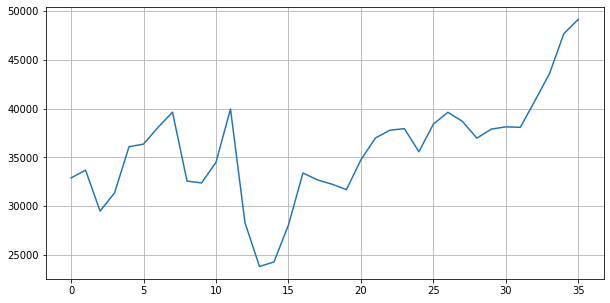

In [654]:
df['Fatalities'].plot(figsize=(10,5), grid=True)
plt.show()

<AxesSubplot:>

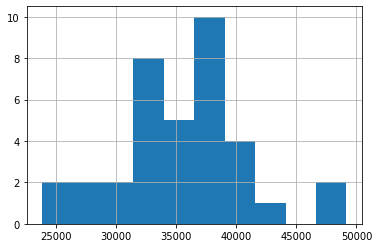

In [655]:
df["Fatalities"].hist(bins =10)

In [656]:
model1_ppc=CmdStanModel(stan_file='first_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [657]:
R = 1000
sim=model1_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

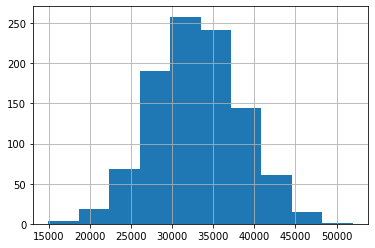

In [658]:
sim = sim.draws_pd()
sim['deaths'].hist()

In [659]:
model2_ppc=CmdStanModel(stan_file='second_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [660]:
R = 1000
fit=model2_ppc.sample(data=dict(N = len(df), deaths = df.Fatalities.values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [661]:
az.summary(fit, var_names=['mu','sigma','death'],round_to=2, kind='stats')

,mean,sd,hdi_3%,hdi_97%
mu,35616.57,867.93,33982.70,37213.20
sigma,5216.40,590.84,4200.57,6361.72
death,35789.04,5468.31,25626.70,45956.80


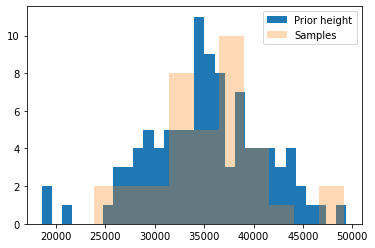

In [662]:
fit = fit.draws_pd()
fit['death'][0:100].hist(bins=30)
df['Fatalities'].hist(alpha=0.3)
plt.legend(['Prior height', 'Samples'])
plt.grid()
plt.show()


In [663]:
model_1_fit=CmdStanModel(stan_file='first_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [664]:
data_fit={'N':len(df), 'Miles':df['Miles'], 'deaths':df['Fatalities']}
fit=model_1_fit.sample(data=data_fit,seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [665]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')
az.summary(fit, var_names=['beta','sigma','alpha'],round_to=2, kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,18.31,1.59,15.37,21.23
sigma,1975.46,110.98,1772.10,2186.82
alpha,27520.91,788.47,26012.20,28966.50


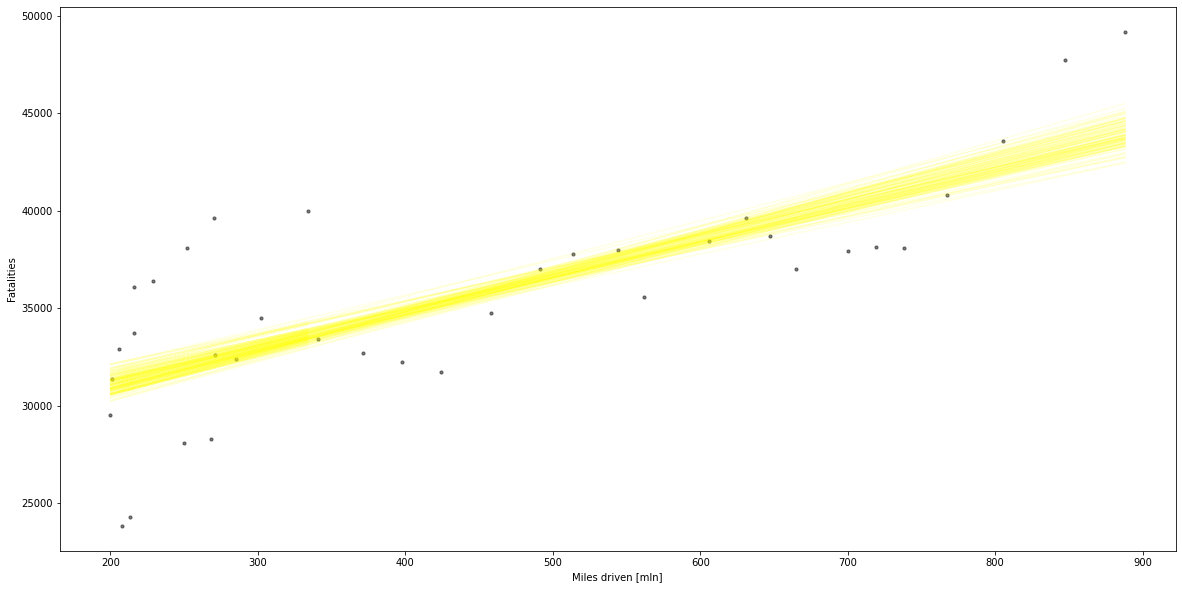

In [666]:
fig, axes = plt.subplots(1,1,figsize=(20,10))
for i in range(100):
    axes.plot(df.Miles,
    alpha[i]+beta[i]*df.Miles, alpha=0.1, color='yellow')
plt.xlabel("Miles driven [mln]")
plt.ylabel("Fatalities")
axes.scatter(df.Miles, df.Fatalities, color='black',alpha=0.5,s=10)

    

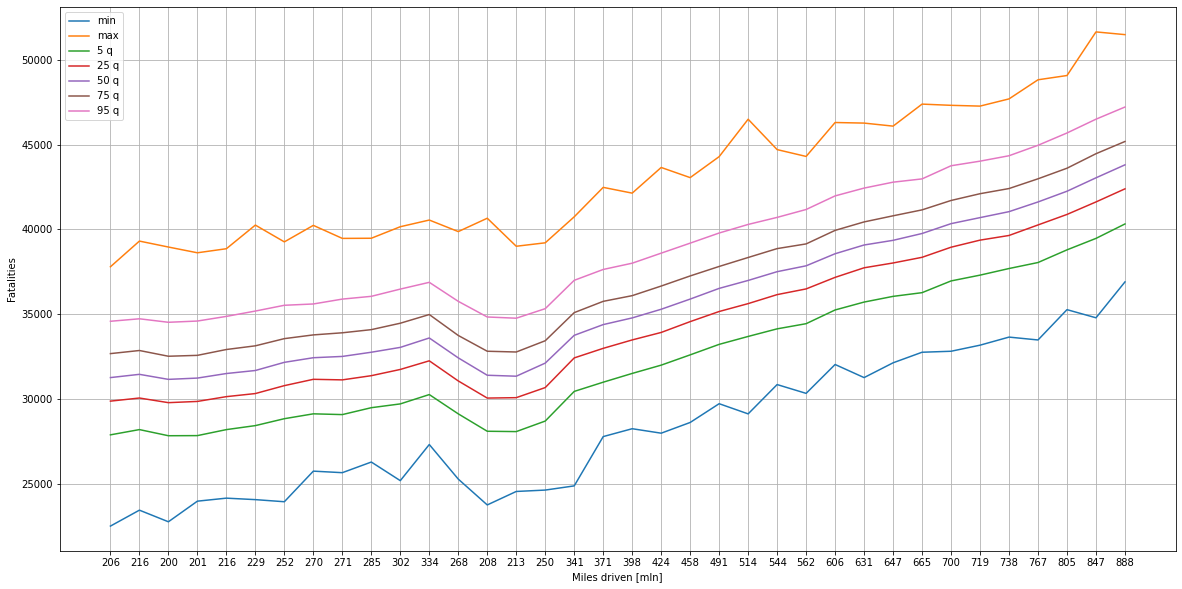

In [667]:
# alpha_sim=sim.stan_variable('alpha')
# beta_sim=sim.stan_variable('beta')
# fig, axes = plt.subplots(1,1,figsize =(7,4))
# axes.hlines([0,50000],xmin=df.Miles.min(),xmax=df.Miles.max(),linestyle = "--",color = "black")
# for i in range(50):
#     axes.plot(df.Miles,alpha_sim[i]+beta_sim[i]*df.c_miles,alpha=0.5,linewidth =0.5)
# axes.set_xlabel('Miles driven[mln]')
# axes.set_ylabel('Fatalities')
# plt.show()
fit_height = fit.draws_pd()
fit_height = fit_height.loc[:,'death[1]':]
data2 = {'min' : fit_height.min(),
        'max' : fit_height.max(),
        '5 q' : fit_height.quantile(0.05),
        '25 q' : fit_height.quantile(0.25),
        '50 q' : fit_height.quantile(0.5),
        '75 q' : fit_height.quantile(0.75),
        '95 q' : fit_height.quantile(0.95)}

fit_data = pd.DataFrame(data2)
fit_data.plot(figsize=(20,10))
plt.xlabel("Miles driven [mln]")
plt.ylabel("Fatalities")
default_x_ticks = range(len(df.Miles))
plt.xticks(default_x_ticks, df.Miles)
plt.grid()


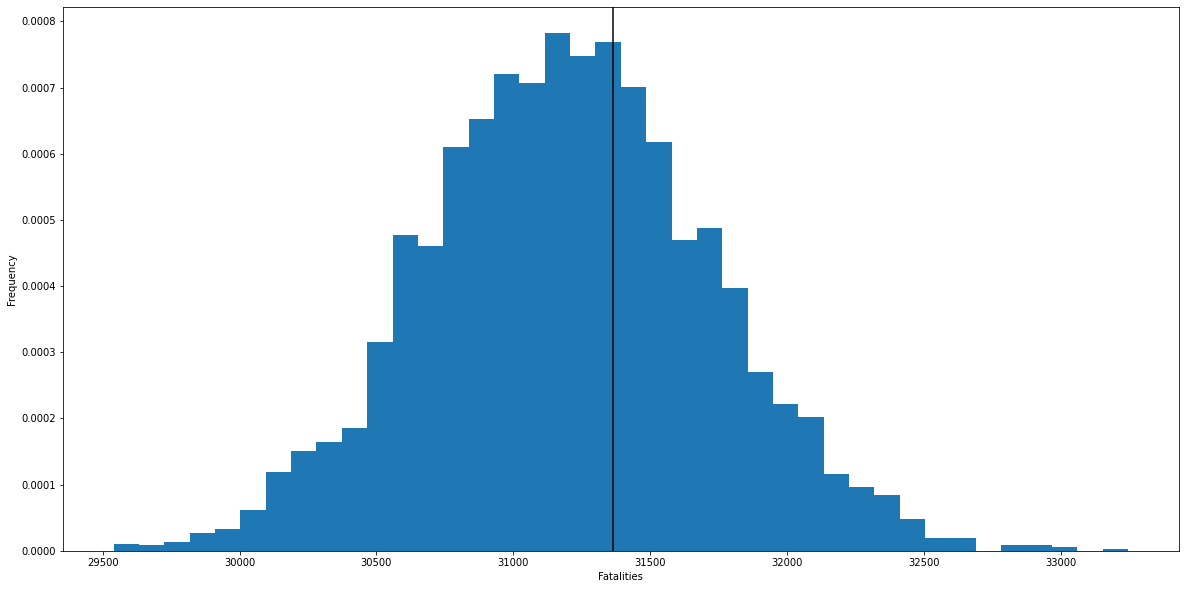

In [668]:
mu3500 = alpha+beta*(201)
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.hist(mu3500,bins=40,density=True)
plt.axvline(x = 31363, color = 'black', label = 'Actual data for 491mln miles')
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()

<center><h1>DRUGI MODEL</h1></center>